<a href="https://colab.research.google.com/github/htcysl/Machine-Learning-/blob/main/HaticeUysal_HW_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this homework, Google Colab was used.  

Upload data

In [228]:
import pandas as pd
import numpy as np

In [229]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

In [230]:
print(train['x1'].shape)
print(train['x2'].shape)
print(train['y'].shape)

(10000,)
(10000,)
(10000,)


In [231]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

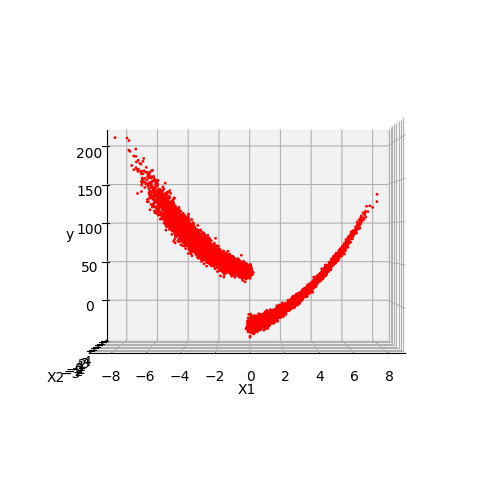

In [232]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(train['x1'], train['x2'], train['y'], color='red', s=1, alpha=1)
ax.set(xlabel='X1', ylabel='X2', zlabel='y')
ax.view_init(elev=0, azim=270,roll=0)
plt.show()

When we look at the 3D visualization of the training set and changing the position of the drawing( *using view_init(elev, azim,roll) with different parameters values* ), we understand that the train set is consisted of two distinct parts, right and left. However, the left part is similar to the symmetrical pattern to the right part, but with a shift up approximately 50 units according to <strong>'x1'</strong> variables.

The same phenomenon is observed in the test set, as illustrated below.



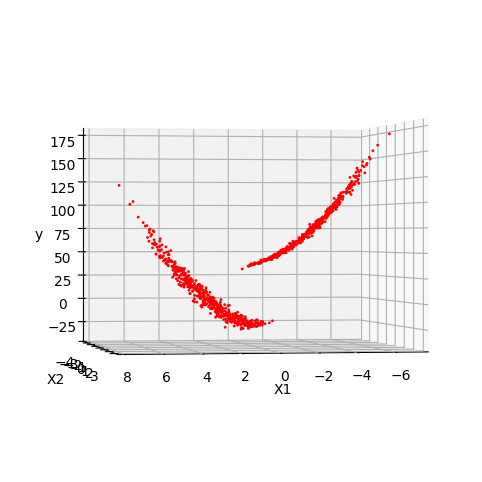

In [233]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(test['x1'], test['x2'], test['y'], color='red', s=1, alpha=1)
ax.set(xlabel='X1', ylabel='X2', zlabel='y')
ax.view_init(elev=0, azim=80,roll= 0)
plt.show()

Instead of using the entire dataset for a nonlinear regression model, I divided the dataset based on the values of the <strong>'x1'</strong> variables. Then two subsets were generated as <strong>'x1_neg'</strong> where 'x1' is less than 0, and <strong>'x1_pos'</strong> where 'x1' is greater or equal to zero.  



In [234]:
x1_neg = train[train.x1 < 0]   ## negative x1 part
x1_pos = train[train.x1 >= 0]   ## positive x1 part
print(x1_neg)
print(x1_pos)

            x1        x2           y
0    -4.739020  0.302743  112.083572
5    -2.552481 -1.256487   57.254095
9    -2.277454  1.328077   67.940992
10   -3.733292  1.425926   93.589410
11   -3.999499 -1.822211   79.240897
...        ...       ...         ...
9995 -3.637279  0.053513   86.564625
9996 -2.615284 -0.378171   64.622550
9997 -1.035585 -1.380086   39.917066
9998 -3.687971  0.749875   90.295649
9999 -2.401762 -0.374290   59.446111

[4924 rows x 3 columns]
            x1        x2          y
1     2.664033 -0.870022   2.366463
2     2.055096 -1.845919  -8.793199
3     1.239990  0.701330 -11.962861
4     1.798721 -0.418756  -9.034034
6     1.142194 -0.569699 -17.476075
...        ...       ...        ...
9981  3.572647  0.703762  17.609795
9984  1.387451  0.070337 -12.172632
9987  2.892066 -0.992477   6.815284
9989  3.770957  0.430836  20.990338
9992  0.934948  0.130260 -16.941962

[5076 rows x 3 columns]


Then the process continued to divide into <strong> 'X1_neg' </strong> and <strong> 'y_neg' </strong> for x1_neg subdataset, and <strong> 'X1_pos' </strong> and <strong> 'y_pos' </strong> for x1_pos subdataset.

In here, 'X1_neg' and 'X1_pos' are features for the training, corresponding target variables 'y_neg' and 'y_pos' to use the training of a nonlinear regression model

In [235]:
X1_neg = x1_neg.drop(['y'], axis = 1)    ## X1_neg's columns ['x1','x2']
y_neg = x1_neg[['y']]                    ## y_neg's column ['y']

X1_pos = x1_pos.drop(['y'], axis = 1)    ## X1_pos's columns ['x1', 'x2']
y_pos = x1_pos[['y']]                    ## y_pos's column ['y']

print(X1_neg.shape)
print(y_neg.shape)
print(X1_pos.shape)
print(y_pos.shape)

(4924, 2)
(4924, 1)
(5076, 2)
(5076, 1)


Necessary libraries are important into Colab

In [236]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

Below, <strong>bias_variance_tradeoff </strong> function is  defined. In this function, we establish a pipeline that transforms polynomial features into linear features. Subsequently, we compute the mean squared error and return both the training and validation errors.

In [237]:
def bias_variance_tradeoff(degree, X_train ,y_train, X_val, y_val) :  ## Defination of bias variance trade off as a function

  poly_features = PolynomialFeatures(degree = degree)    ## Create polinomial features
  model = make_pipeline(poly_features, LinearRegression())   ## Make pipeline to connect ploynomial model to linear

  model.fit(X_train,y_train)  ## Predict the model on the training data

  y_train_pred = model.predict(X_train)     ## Predict on training set
  y_val_pred = model.predict(X_val)        ## Predict on validation set

  train_error = mean_squared_error(y_train, y_train_pred)      ## Calculate mean squared error for both sets
  val_error = mean_squared_error(y_val,y_val_pred)

  return train_error, val_error

Splitting the X1_neg and y_neg data sets as train and validation sets

In [238]:
def train(X,y) :

  X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=123) ## X1_neg part of trian dataset

  print(f"Shape of X train :       {X_train.shape}")
  print(f"Shape of X validation :  {X_val.shape}")
  print(f"Shape of y train :       {y_train.shape}")
  print(f"Shape of y validation :  {y_val.shape}")
  print()
  degrees = range(1, 15)   ## Choose a range of degrees for polynamial features

  train_errors = []    ## train error
  val_errors= []      ## validation error


  for degree in degrees:    ## Evaluate bias-variance tradeoff for each degree
    train_error, val_error = bias_variance_tradeoff(degree, X_train,y_train,X_val, y_val)

    train_errors.append(train_error)
    val_errors.append(val_error)


  # Visualize bias-variance tradeoff
  plt.plot(degrees, train_errors,label='Training Error')
  plt.plot(degrees, val_errors, label = 'Validation Error')
  plt.title("Bias Variance Tradeoff ")
  plt.xlabel('Degree of Polynomial Features')
  plt.ylabel('Mean Squared Error')
  plt.legend()
  plt.show()

  optimal_deg = degrees[np.argmin(val_errors)]  ## Choose the optimal degree based on the bias-variance tradeoff
  print(f"Optimal degre : {optimal_deg}")

  return optimal_deg

Shape of X train :       (3939, 2)
Shape of X validation :  (985, 2)
Shape of y train :       (3939, 1)
Shape of y validation :  (985, 1)



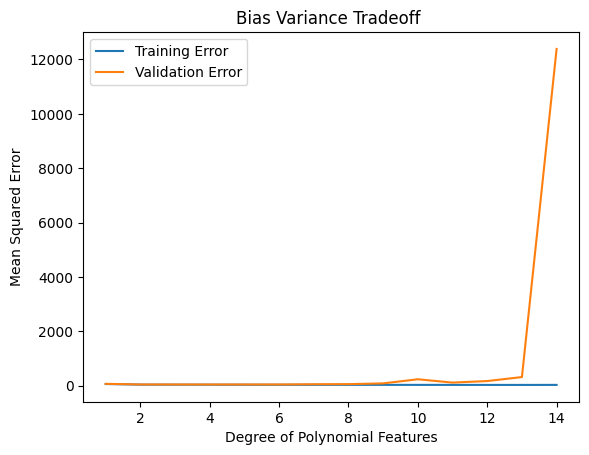

Optimal degre : 4


In [239]:
optimal_deg_neg = train(X1_neg,y_neg)

Above, the plot illustrates the relationship between 14 different polynomial degrees and their respective mean squared errors. However, it becomes apparent that beyond degree 12, the error experiences a sharp increase. Consequently, a decision was made to select a polynomial degree for the features that is less than 12, as below the optimum degree is 4.

The same procedure was repeated for the **X1_pos** and **y_pos** subdatasets .

Shape of X train :       (4060, 2)
Shape of X validation :  (1016, 2)
Shape of y train :       (4060, 1)
Shape of y validation :  (1016, 1)



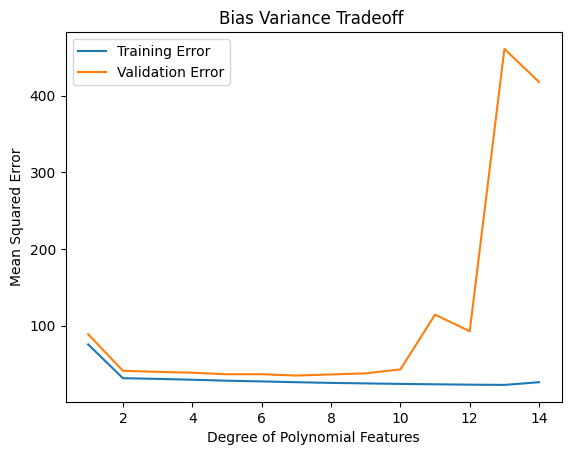

Optimal degre : 7


In [240]:
optimal_deg_pos = train(X1_pos,y_pos)

When we compare the plot results, we see that the left subset gives more accurate result than the rigth subset due to noise. And the optimum polinomial degree is 7, as shown below.

In [241]:
## Trian the model on the left (x1 negative) training data with the optimal degree
X1neg_model = make_pipeline(PolynomialFeatures(degree=optimal_deg_neg), LinearRegression())
X1neg_model.fit(X1_neg,y_neg)


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=4)),
                ('linearregression', LinearRegression())])

In [242]:
## Trian the model on the left (x1 negative) training data with the optimal degree
X1pos_model = make_pipeline(PolynomialFeatures(degree=optimal_deg_pos), LinearRegression())
X1pos_model.fit(X1_pos,y_pos)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=7)),
                ('linearregression', LinearRegression())])

Before we proceed to test the models, the test data is partitioned in a manner similar to the train set.

In [243]:
x1_neg = test[test.x1 < 0].reset_index(drop=True)   ## negative x1 part
x1_pos = test[test.x1 >= 0].reset_index(drop=True)   ## positive x1 part

print(test.shape)
print(x1_neg.shape)
print(x1_pos.shape)

(1000, 3)
(483, 3)
(517, 3)


**X1_neg** and **y_neg** are for the  **X1neg_model**

 **X1_pos** and **y_pos** are for the **X1pos_model**

In [244]:
X1_neg = x1_neg.drop(['y'], axis = 1)   ## X1_neg's columns ['x1','x2']
y_neg = x1_neg[['y']]   ## y_neg's column ['y']

X1_pos = x1_pos.drop(['y'], axis = 1)  ## X1_pos's columns ['x1', 'x2']
y_pos = x1_pos[['y']]   ## y_pos's column ['y']

print(X1_neg.shape)
print(y_neg.shape)
print(X1_pos.shape)
print(y_pos.shape)

(483, 2)
(483, 1)
(517, 2)
(517, 1)


In [245]:
X_test = pd.concat([X1_neg,X1_pos], axis =0 )
y_test = pd.concat([y_neg,y_pos], axis = 0)

X_test

,x1,x2
0,-0.572012,-1.643082
1,-4.909423,1.688236
2,-3.785981,1.587001
3,-0.294986,-0.401366
4,-5.220099,0.402268
...,...,...
512,3.363019,-0.644377
513,0.131275,1.156052
514,0.792128,0.083895
515,3.747915,-0.443561


The prediction results are stored in **neg_pred** and **pos_pred**, then these predictions are concatenated into a single array labeled **y_pred**


In [246]:
#Evaluate the final models on the X1_neg and X1-pos subsets
neg_pred = X1neg_model.predict(X1_neg)
pos_pred = X1pos_model.predict(X1_pos)

y_pred = np.concatenate([neg_pred, pos_pred], axis=0)


Evaluation metrics

In [247]:
test_error = mean_squared_error(y_test,y_pred)
print(f"Test Error (MSE) for optimal degree : {test_error}")

r2_score = r2_score(y_test,y_pred)
print(f"Test r^2 for the models :  {r2_score}")

Test Error (MSE) for optimal degree : 32.42723167462973
Test r^2 for the models :  0.9817765911293754


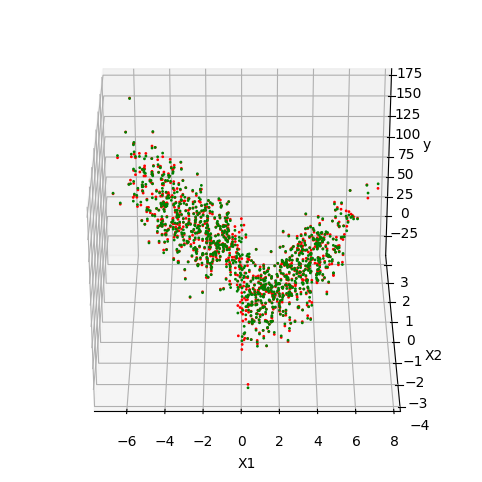

The green points are predicted values and the red points are the true values


In [248]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_test['x1'], X_test['x2'], y_pred, color='green', s=1, alpha=1)
ax.scatter(X_test['x1'], X_test['x2'], y_test['y'], color='red', s=1, alpha=1)
ax.set(xlabel='X1', ylabel='X2', zlabel='y')
ax.view_init(elev=30, azim=270,roll=0)
plt.show()
print("The green points are predicted values and the red points are the true values")

In this study, two polinomial regression models were transported into linear regression models due to distribution of the data.Using this approach yielded higher accuracy when compared to using a single polinomial model.

This may be not a professional approach dividining the data set then using two models, in the ML field there can be exist more simpler way.

In [249]:
print(f"r^2 : {r2_score}")
print((r2_score - 0.6)*2.5 , " + quality of the code ")

r^2 : 0.9817765911293754
0.9544414778234387  + quality of the code 
